<a href="https://colab.research.google.com/github/PradipNichite/Youtube-Tutorials/blob/main/Yotutube_WordVectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
# https://radimrehurek.com/gensim/models/word2vec.html
# https://analyticsindiamag.com/word2vec-vs-glove-a-comparative-guide-to-word-embedding-techniques/

<h3> Agenda </h3>

*   Use Pretrained Word Vectors
*   Use word vecotrs as feature for classification









In [ ]:
!pip install --upgrade gensim -q
!pip install matplotlib -q

In [1]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string

In [2]:
gensim.__version__

'4.3.2'

In [2]:
np.random.seed(42)

Use Pretrained Word Vectors

In [3]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [4]:
# wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [8]:
# wv.save('saved_vectors.kv')

In [11]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load('saved_vectors.kv')

In [12]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [6]:
wv['apple']

array([-0.06445312, -0.16015625, -0.01208496,  0.13476562, -0.22949219,
        0.16210938,  0.3046875 , -0.1796875 , -0.12109375,  0.25390625,
       -0.01428223, -0.06396484, -0.08056641, -0.05688477, -0.19628906,
        0.2890625 , -0.05151367,  0.14257812, -0.10498047, -0.04736328,
       -0.34765625,  0.35742188,  0.265625  ,  0.00188446, -0.01586914,
        0.00195312, -0.35546875,  0.22167969,  0.05761719,  0.15917969,
        0.08691406, -0.0267334 , -0.04785156,  0.23925781, -0.05981445,
        0.0378418 ,  0.17382812, -0.41796875,  0.2890625 ,  0.32617188,
        0.02429199, -0.01647949, -0.06494141, -0.08886719,  0.07666016,
       -0.15136719,  0.05249023, -0.04199219, -0.05419922,  0.00108337,
       -0.20117188,  0.12304688,  0.09228516,  0.10449219, -0.00408936,
       -0.04199219,  0.01409912, -0.02111816, -0.13476562, -0.24316406,
        0.16015625, -0.06689453, -0.08984375, -0.07177734, -0.00595093,
       -0.00482178, -0.00089264, -0.30664062, -0.0625    ,  0.07

In [7]:
len(wv['apple'])

300

In [9]:
wv.similarity("apple", "mango")

0.57518554

In [10]:
wv.similarity("apple", "car")

0.12830707

In [11]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [12]:
print(wv.most_similar(positive=['car', 'minivan'], topn=5))

[('SUV', 0.8532192707061768), ('vehicle', 0.8175783753395081), ('pickup_truck', 0.7763688564300537), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.7565720081329346)]


In [13]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


#### Semantic regularities captured in word embeddings

In [14]:
wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951)]

In [ ]:
wv.most_similar(positive=['woman', 'king'], topn=3)

[('man', 0.6628609299659729),
 ('queen', 0.6438563466072083),
 ('girl', 0.6136074066162109)]

In [16]:
words = ["one",'two','man','woman','table']

In [ ]:
# https://deepai.org/dataset/text8

In [17]:
sample_vectors = np.array([wv[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[ 0.41775945,  0.906729  ],
       [ 0.52036536,  1.3947775 ],
       [-1.2547548 , -0.3259122 ],
       [-1.6043063 , -0.64717937],
       [ 1.920937  , -1.328415  ]], dtype=float32)

### Visualizing these word vectors

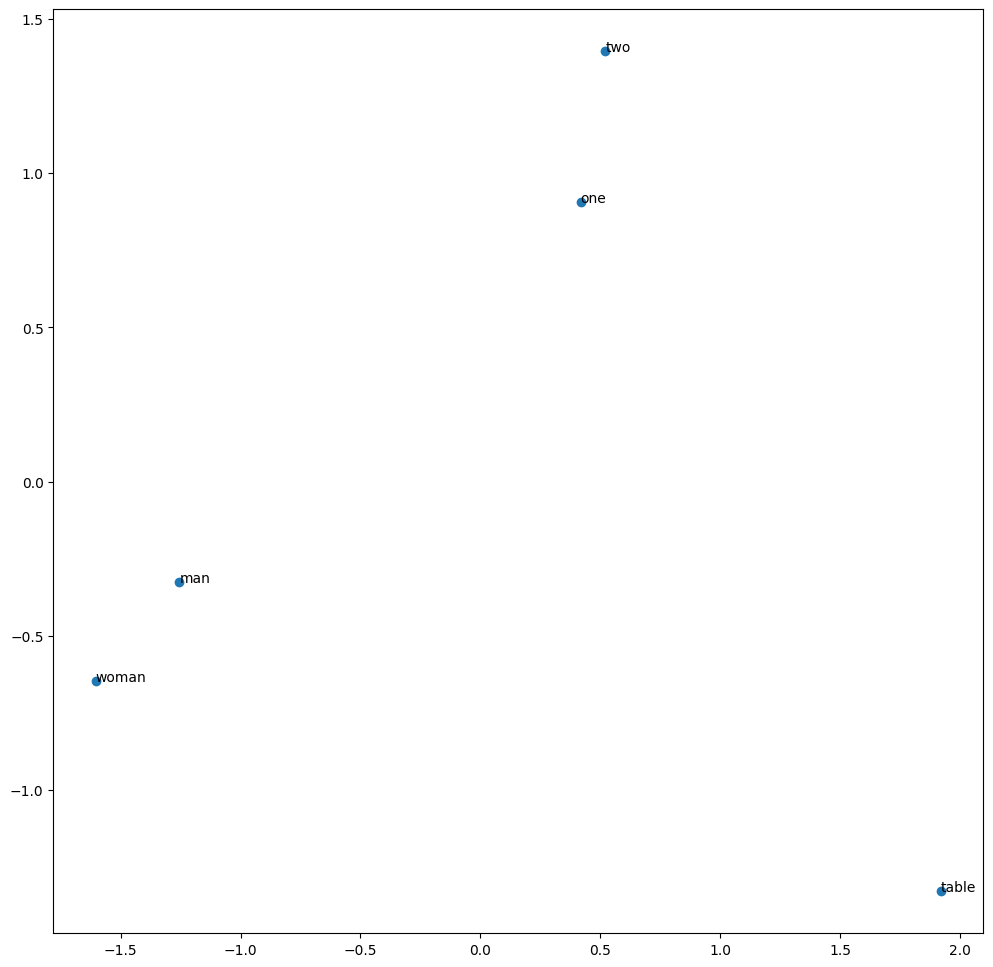

In [18]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [27]:
data = pd.read_csv("train.csv", engine="python")
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [5]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [29]:
sent_vec("I am happy")

array([-0.08447266,  0.10973685, -0.00453404,  0.18362863, -0.05944824,
       -0.04013497, -0.10041155,  0.03710938, -0.02503313,  0.04729353,
       -0.07543836, -0.16434152, -0.1116333 ,  0.02915737, -0.12290737,
        0.10421317, -0.00425502,  0.27535575, -0.01681083, -0.08075387,
       -0.26747349, -0.07281712,  0.08138602, -0.02498954, -0.05358887,
       -0.07969884, -0.30385045,  0.10531616, -0.03756278, -0.04029192,
        0.06455776, -0.02200753, -0.11361694, -0.12702288, -0.19824219,
        0.06921387, -0.14557757,  0.18457031, -0.05542864,  0.10093471,
        0.10728237, -0.07920619, -0.01236398,  0.11485073,  0.09437779,
        0.02020509, -0.08954729, -0.12911551, -0.0363072 ,  0.05212402,
       -0.12200056,  0.23856027, -0.04056222,  0.12512207,  0.05569894,
        0.1237793 , -0.08370536, -0.05489676, -0.0291748 , -0.18401228,
       -0.14592634, -0.04910714, -0.15844727, -0.03636387,  0.00628662,
       -0.30032785, -0.11404855,  0.08530971,  0.01077706,  0.05

In [8]:
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'anywhere', 'forty', 'or', 'with', 'less', 'is', 'by', 'even', 'five', 'seeming', 'whereupon', 'across', 'whom', 'serious', 'an', 'about', 'he', 'on', 'twelve', 'could', 'amongst', 'now', 'since', 'would', 'go', 'for', 'keep', 'everyone', 'becomes', 'seem', 'became', 'had', "n't", 'doing', '‘d', 'while', 'least', '’re', 'whose', 'that', 'whenever', 'become', 'herein', 'throughout', 'together', 'using', 'whole', 'she', 'thus', 'around', 'whereas', 'nor', 'empty', 'through', 'thereupon', 'be', 'which', 'various', 'it', 'against', 'give', 'move', 'three', 'wherever', 'this', 'toward', 'us', 'ever', 'onto', 'indeed', 'your', 'beside', 'besides', 'eleven', 'fifteen', 'any', 'behind', 'has', 'something', 'being', 'each', 'whereafter', 'yourself', 'as', 'whether', 'his', 'latter', 'noone', 'sometime', 'enough', 'unless', 'we', 'alone', 'amount', 'if', 'never', 'always', 'may', 'made', "'re", 'ca', 'am', 'much', '‘s', 'and', 'formerly', 'their', 'full', 'although', 'front', 'none', 'been', 'f

In [9]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [30]:
# data['tokens'] = data['comment_text'].apply(spacy_tokenizer)

In [3]:
data.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tokens
0,0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"['explanation', 'edit', 'username', 'hardcore'..."
1,1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[""d'aww"", 'match', 'background', 'colour', 'se..."
2,2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"['hey', 'man', 'try', 'edit', 'war', 'guy', 'c..."
3,3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"['real', 'suggestion', 'improvement', 'wonder'..."
4,4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"['sir', 'hero', 'chance', 'remember', 'page']"


In [32]:
# data.to_csv("modified.csv")

In [2]:
data = pd.read_csv("modified.csv", engine="python")

In [13]:
data['vec'] = data['tokens'].apply(sent_vec)

In [14]:
data.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tokens,vec
0,0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"['explanation', 'edit', 'username', 'hardcore'...","[-0.12780601099917763, 0.10569468715734649, -0..."
1,1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[""d'aww"", 'match', 'background', 'colour', 'se...","[-0.1367246566280242, 0.05718206590221774, 0.0..."
2,2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"['hey', 'man', 'try', 'edit', 'war', 'guy', 'c...","[-0.16925460301088482, 0.10642130991046349, -0..."
3,3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"['real', 'suggestion', 'improvement', 'wonder'...","[-0.17169914391762453, 0.10963574405830939, -0..."
4,4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"['sir', 'hero', 'chance', 'remember', 'page']","[-0.17748260498046875, 0.12705230712890625, -0..."


In [15]:
X = data['vec'].to_list()
y = data['toxic'].to_list()

In [36]:
X[0]

array([-0.00541978,  0.04675584,  0.00133696,  0.0850801 , -0.06447638,
       -0.00180263, -0.00253596, -0.11783854,  0.12369792,  0.02642146,
       -0.02159773, -0.03835333, -0.02583386,  0.02868071, -0.09855725,
        0.0882859 ,  0.01708984,  0.05018398, -0.01936704, -0.13048444,
        0.074941  ,  0.06057485,  0.08355422,  0.03940982, -0.03506034,
        0.03308033, -0.05092076,  0.09277489,  0.04749698, -0.10054706,
       -0.04815383,  0.01269531, -0.09663028, -0.00693476, -0.02238973,
       -0.0322905 ,  0.08835856,  0.03654298,  0.06050037,  0.1015625 ,
        0.04052734, -0.04001726,  0.16807138, -0.01393345, -0.0494363 ,
       -0.10120501, -0.00805664, -0.02898362, -0.09638904,  0.03300985,
       -0.10766166, -0.01426442, -0.03711337, -0.08377511,  0.00310989,
       -0.01328096, -0.05810547, -0.06438337, -0.023888  , -0.09505208,
       -0.02969215, -0.00195022, -0.02789452, -0.03556315, -0.06668381,
       -0.02664621, -0.0712818 ,  0.02684675, -0.03303019,  0.12

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [18]:
classifier.fit(X_train,y_train)

C:\Users\Kolyanys\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
from sklearn import metrics
predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))
print("Logistic Regression log_loss:",metrics.log_loss(y_test, predicted))

Logistic Regression Accuracy: 0.9103869653767821
Logistic Regression Precision: 0.7002012072434608
Logistic Regression Recall: 0.11376266753841124
Logistic Regression log_loss: 3.229981159106221
